<a href="https://colab.research.google.com/github/jeevitha16ds/jeevitha16ds/blob/main/Artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('Copy of mynew.csv')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
#import the model
from keras.models import Sequential# we are creating sequential model

In [ ]:
from keras.layers import Dense # To get layers
# dense creates neural network which connects to every other layere

In [ ]:
model=Sequential()# initialise the model

In [ ]:
model.add(Dense(units=12,input_dim=8, activation ='tanh'))# first layer
model.add(Dense(units=8,activation='tanh'))  # second layer or hidden layer
model.add(Dense(units=1,activation='swish'))#last layer or output layer
#relu,tanh,sigmoid ,softmax,swish are all activation function ,,we can use any of them 
#input_dim is nothing but tensor i.e the tuple values  we are passing

In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])#sgd=stochastic gradient descent
# optimization reduces the loss
#binary cross entropy is loss function

In [ ]:
#model.fit(X , y , epochs=150 , batch_size=10 , verbose=1)
#each epoch it will iterate over the entire sample
#verbose to see the output  by default its 1
history=model.fit(X,y,validation_split=0.20,epochs=200,batch_size=10,verbose=1)
#validation_ split is test_size in keras unlike sklearn here terminology is different
#first two columns training data
# last two columns for test data(20%)
print(history.history.keys())
#history in keras is callback which records couple of variables like dickeys='loss', 'accuracy', 'val_loss', 'val_accuracy'

Epoch 1/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7524 - val_loss: 0.5083 - val_accuracy: 0.7792
Epoch 2/200
62/62 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7785 - val_loss: 0.4630 - val_accuracy: 0.8052
Epoch 3/200
62/62 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7736 - val_loss: 0.4716 - val_accuracy: 0.8052
Epoch 4/200
62/62 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7704 - val_loss: 0.4747 - val_accuracy: 0.8052
Epoch 5/200
62/62 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7785 - val_loss: 0.4957 - val_accuracy: 0.7922
Epoch 6/200
62/62 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7785 - val_loss: 0.4724 - val_accuracy: 0.8182
Epoch 7/200
62/62 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7720 - val_loss: 0.4711 - val_accuracy: 0.7857
Epoch 8/200
6

In [ ]:
#increasing layers will depend on increase or decreasing accuracy value
#activation function to know eventual output values of neuron

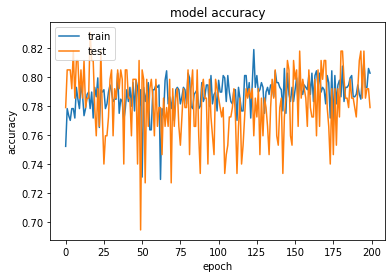

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

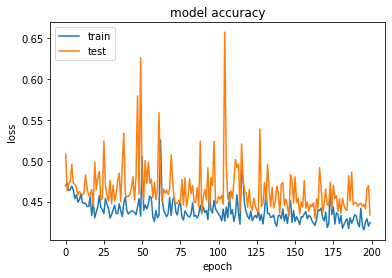

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#predictions
predictions=model.predict_classes(X)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#predictions

In [ ]:
for i in range(0,20):
  print('actual--->%d and predicted--->%d' %(y[i],predictions[i]))
  #or   print('actual is %d and predicted is %d' %(y[i],predictions[i]))
 # %d formatting specifier integer 

actual--->1 and predicted--->1
actual--->0 and predicted--->0
actual--->1 and predicted--->1
actual--->0 and predicted--->0
actual--->1 and predicted--->1
actual--->0 and predicted--->0
actual--->1 and predicted--->0
actual--->0 and predicted--->0
actual--->1 and predicted--->1
actual--->1 and predicted--->0
actual--->0 and predicted--->0
actual--->1 and predicted--->1
actual--->0 and predicted--->1
actual--->1 and predicted--->1
actual--->1 and predicted--->0
actual--->1 and predicted--->0
actual--->1 and predicted--->0
actual--->1 and predicted--->0
actual--->0 and predicted--->0
actual--->1 and predicted--->0
